In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [29]:
def computeCost(X,theta,y):
    m=X.shape[0]
    h=np.dot(X,theta) #theta supplied is theta.T
    error=h-y
    return np.sum(np.power(error,2))/(2*m)

In [4]:
data=pd.read_csv("ex1data1.txt",header=None,names=['Population','Profit'])

In [5]:
def plot(data,X,Y):
    plt.scatter(x=data[X],y=data[Y])
    plt.xlabel('Population')
    plt.ylabel('Profit')

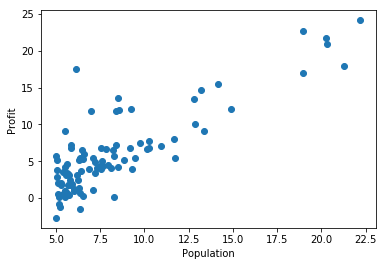

In [6]:
plot(data,'Population','Profit')

In [7]:
data.insert(0, 'Ones', 1)

In [87]:
cols=data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
m=X.shape[0]
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))
theta=theta.T
computeCost(X,theta,y)

32.072733877455676

In [88]:
def gradientDescent(alpha,iterations,theta,X,y):
    m=X.shape[0]
    JHist=np.zeros(iterations)
    for i in range(iterations):
        H=np.dot(X,theta)
        error=H-y
        delta=np.matrix(np.zeros((theta.shape)))
        for j in range(theta.shape[0]):
            delta[j,0]=(1/m)*np.dot(error.T,X[:,j])
        theta=theta-np.dot(alpha,delta)
        JHist[i]=computeCost(X,theta,y)
    return theta,JHist

In [89]:
theta,JHist=gradientDescent(0.01,1500,theta,X,y)

In [85]:
print(theta)
computeCost(X,theta,y)

[[-3.63029144]
 [ 1.16636235]]


4.483388256587726

Text(0.5, 1.0, 'Predicted Profit vs Population')

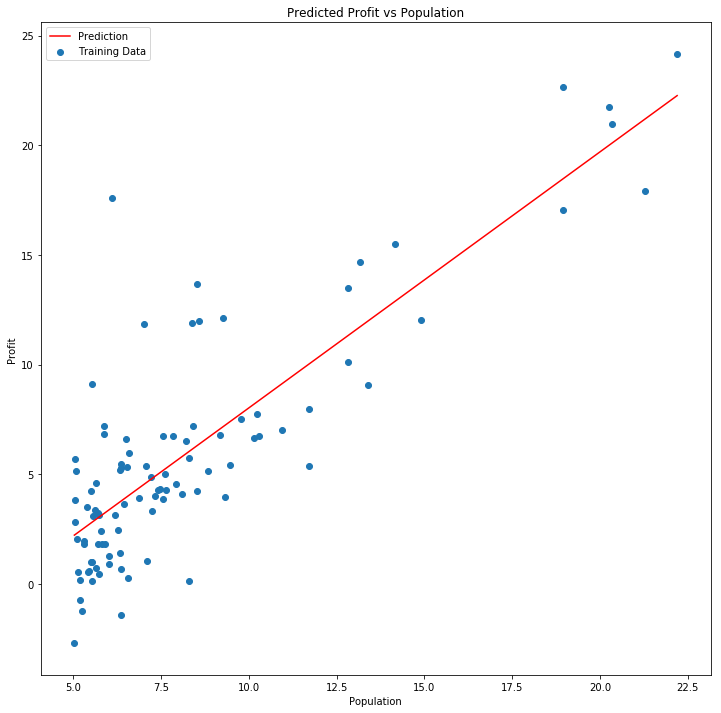

In [92]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=theta[0,0]+(theta[1,0]*x)
figure,axes=plt.subplots(figsize=(12,12))
axes.plot(x,f,'r',label='Prediction')
axes.scatter(data.Population,data.Profit,label='Training Data')
axes.legend(loc=2)
axes.set_xlabel('Population')
axes.set_ylabel('Profit')
axes.set_title('Predicted Profit vs Population')

Text(0.5, 1.0, 'Error vs. Training Epoch')

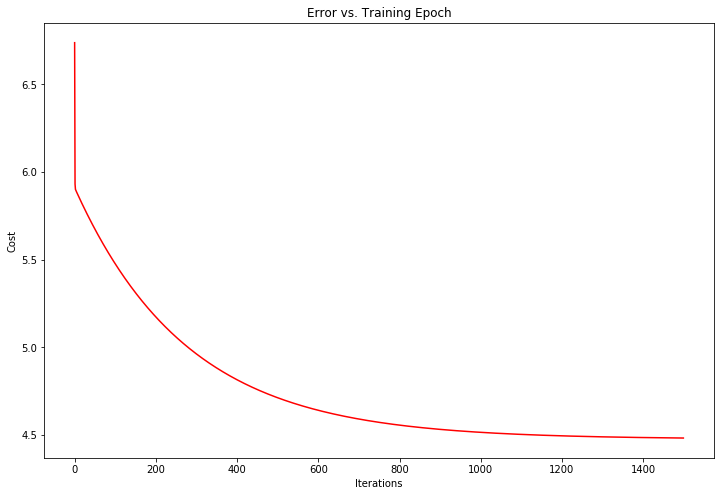

In [96]:
iterations=1500
figure,axes=plt.subplots(figsize=(12,8))
x=np.arange(iterations)
axes.plot(x,JHist,'r')
axes.set_xlabel('Iterations')
axes.set_ylabel('Cost')
axes.set_title('Error vs. Training Epoch')

In [116]:
data2=pd.read_csv("ex1data2.txt",header=None,names=['Size','Bedroom','Cost'])
data2=(data2-data2.mean())/data2.std()
data2.head()

,Size,Bedroom,Cost
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [117]:
data2.insert(0,'Ones',1)
cols=data2.shape[1]
X=data2.iloc[:,0:cols-1]
y=data2.iloc[:,cols-1:cols]

In [118]:
X.head()

,Ones,Size,Bedroom
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [119]:
y.head()

,Cost
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [120]:
X=np.matrix(X.values)
y=np.matrix(y.values)

In [124]:
alpha=0.01
iterations=1000
theta=np.matrix(np.array([0,0,0]))
theta=theta.T
theta,JHist=gradientDescent(alpha,iterations,theta,X,y)
print(computeCost(X,theta,y))

0.13070336960771892


In [125]:
theta

matrix([[-1.10951437e-16],
        [ 8.78503652e-01],
        [-4.69166570e-02]])

Text(0.5, 1.0, 'Error vs. Training Epoch')

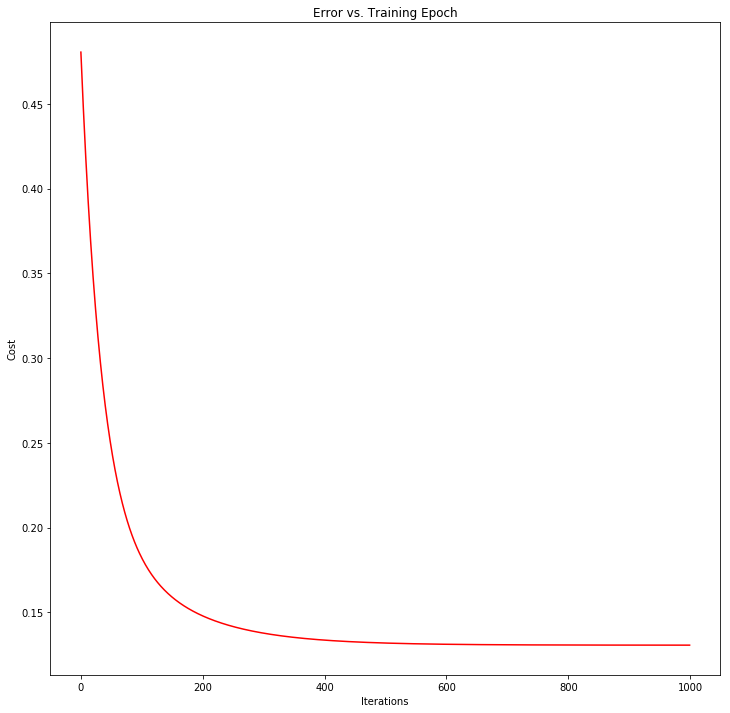

In [127]:
figure,axes=plt.subplots(figsize=(12,12))
x=np.arange(iterations)
axes.plot(x,JHist,'r')
axes.set_xlabel('Iterations')
axes.set_ylabel('Cost')
axes.set_title('Error vs. Training Epoch')